# Project: Wrangling and Analyze Data

<a id='intro'></a>
## Introduction


>This analyses tweets from the tweet archive of Twitter user @dog_rates, also known as WeRateDogs the data is gotten from different sources and formats,WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog,here we are going to gather ,assess and clean the data gotten from the sources and run a few analysis and visualisations on it.
>
>The main goal is to find out the dog stage that has the most likes and retweets and also checking out which classification algorithim works best in predicting the dog breed



## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Importing modules
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import tweepy
import json
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
#reading in the twitter archive data 
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#downloading the tweet image prediction data and saving it as TSV file
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [6]:
#reading in the image prediction data
image_pred = pd.read_csv('image-predictions.tsv', sep = '\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
consumer_key = 'XXXXX'
consumer_secret = 'XXXXX'
access_token = 'XXXXX'
access_secret = 'XXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

> Querying Twitter API for each tweet in the Twitter archive using the tweet ids and saving it as a "json.txt" ,tweets id which have been deleted are appended to the list "deleted_ids"

In [8]:
# reference: https://stackoverflow.com/questions/1039877/crunching-json-with-python
# reference: https://docs.python.org/3/tutorial/errors.html
#ref= https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

#getting tweet ids
tweet_ids=twitter_archive['tweet_id'].values
#getting list of deleted ids
deleted_ids = []
with open('tweet_json.txt', mode='w') as file:
    #writing the output of the code to "tweet_json.txt" file
    for tweet_id in tweet_ids:
        #code would take approximately 30 minutes to run due to twitters rate limit so printing each Id for sanity ;) to know its running
        print('for sanity :', tweet_id)
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            tweet_json_line = json.dumps(tweet._json)
            file.write(tweet_json_line + '\n')
            print('Tweet done')
           
        except Exception:
            deleted_ids.append(tweet_id)
            print('Deleted tweet')
        
    print('')
    print('Finally done')

for sanity : 892420643555336193
Tweet done
for sanity : 892177421306343426
Tweet done
for sanity : 891815181378084864
Tweet done
for sanity : 891689557279858688
Tweet done
for sanity : 891327558926688256
Tweet done
for sanity : 891087950875897856
Tweet done
for sanity : 890971913173991426
Tweet done
for sanity : 890729181411237888
Tweet done
for sanity : 890609185150312448
Tweet done
for sanity : 890240255349198849
Tweet done
for sanity : 890006608113172480
Tweet done
for sanity : 889880896479866881
Tweet done
for sanity : 889665388333682689
Tweet done
for sanity : 889638837579907072
Tweet done
for sanity : 889531135344209921
Tweet done
for sanity : 889278841981685760
Tweet done
for sanity : 888917238123831296
Tweet done
for sanity : 888804989199671297
Tweet done
for sanity : 888554962724278272
Tweet done
for sanity : 888202515573088257
Deleted tweet
for sanity : 888078434458587136
Tweet done
for sanity : 887705289381826560
Tweet done
for sanity : 887517139158093824
Tweet done
for sani

Tweet done
for sanity : 855851453814013952
Tweet done
for sanity : 855818117272018944
Tweet done
for sanity : 855459453768019968
Tweet done
for sanity : 855245323840757760
Tweet done
for sanity : 855138241867124737
Tweet done
for sanity : 854732716440526848
Tweet done
for sanity : 854482394044301312
Tweet done
for sanity : 854365224396361728
Tweet done
for sanity : 854120357044912130
Tweet done
for sanity : 854010172552949760
Tweet done
for sanity : 853760880890318849
Tweet done
for sanity : 853639147608842240
Tweet done
for sanity : 853299958564483072
Tweet done
for sanity : 852936405516943360
Tweet done
for sanity : 852912242202992640
Tweet done
for sanity : 852672615818899456
Tweet done
for sanity : 852553447878664193
Tweet done
for sanity : 852311364735569921
Tweet done
for sanity : 852226086759018497
Tweet done
for sanity : 852189679701164033
Tweet done
for sanity : 851953902622658560
Deleted tweet
for sanity : 851861385021730816
Deleted tweet
for sanity : 851591660324737024
Tweet

Tweet done
for sanity : 827324948884643840
Tweet done
for sanity : 827228250799742977
Deleted tweet
for sanity : 827199976799354881
Tweet done
for sanity : 826958653328592898
Tweet done
for sanity : 826848821049180160
Tweet done
for sanity : 826615380357632002
Tweet done
for sanity : 826598799820865537
Tweet done
for sanity : 826598365270007810
Tweet done
for sanity : 826476773533745153
Tweet done
for sanity : 826240494070030336
Tweet done
for sanity : 826204788643753985
Tweet done
for sanity : 826115272272650244
Tweet done
for sanity : 825876512159186944
Tweet done
for sanity : 825829644528148480
Tweet done
for sanity : 825535076884762624
Tweet done
for sanity : 825147591692263424
Tweet done
for sanity : 825120256414846976
Tweet done
for sanity : 825026590719483904
Tweet done
for sanity : 824796380199809024
Tweet done
for sanity : 824775126675836928
Tweet done
for sanity : 824663926340194305
Tweet done
for sanity : 824325613288833024
Tweet done
for sanity : 824297048279236611
Tweet do

Tweet done
for sanity : 801285448605831168
Tweet done
for sanity : 801167903437357056
Tweet done
for sanity : 801127390143516673
Tweet done
for sanity : 801115127852503040
Tweet done
for sanity : 800859414831898624
Tweet done
for sanity : 800855607700029440
Tweet done
for sanity : 800751577355128832
Tweet done
for sanity : 800513324630806528
Tweet done
for sanity : 800459316964663297
Tweet done
for sanity : 800443802682937345
Tweet done
for sanity : 800388270626521089
Tweet done
for sanity : 800188575492947969
Tweet done
for sanity : 800141422401830912
Tweet done
for sanity : 800018252395122689
Tweet done
for sanity : 799774291445383169
Tweet done
for sanity : 799757965289017345
Tweet done
for sanity : 799422933579902976
Tweet done
for sanity : 799308762079035393
Tweet done
for sanity : 799297110730567681
Tweet done
for sanity : 799063482566066176
Tweet done
for sanity : 798933969379225600
Tweet done
for sanity : 798925684722855936
Tweet done
for sanity : 798705661114773508
Tweet done


Tweet done
for sanity : 778027034220126208
Tweet done
for sanity : 777953400541634568
Tweet done
for sanity : 777885040357281792
Tweet done
for sanity : 777684233540206592
Tweet done
for sanity : 777641927919427584
Tweet done
for sanity : 777621514455814149
Tweet done
for sanity : 777189768882946048
Tweet done
for sanity : 776819012571455488
Tweet done
for sanity : 776813020089548800
Tweet done
for sanity : 776477788987613185
Tweet done
for sanity : 776249906839351296
Tweet done
for sanity : 776218204058357768
Tweet done
for sanity : 776201521193218049
Tweet done
for sanity : 776113305656188928
Tweet done
for sanity : 776088319444877312
Tweet done
for sanity : 775898661951791106
Tweet done
for sanity : 775842724423557120
Tweet done
for sanity : 775733305207554048
Tweet done
for sanity : 775729183532220416
Tweet done
for sanity : 775364825476165632
Tweet done
for sanity : 775350846108426240
Tweet done
for sanity : 775096608509886464
Deleted tweet
for sanity : 775085132600442880
Tweet do

Tweet done
for sanity : 751793661361422336
Tweet done
for sanity : 751598357617971201
Tweet done
for sanity : 751583847268179968
Tweet done
for sanity : 751538714308972544
Tweet done
for sanity : 751456908746354688
Tweet done
for sanity : 751251247299190784
Tweet done
for sanity : 751205363882532864
Tweet done
for sanity : 751132876104687617
Tweet done
for sanity : 750868782890057730
Tweet done
for sanity : 750719632563142656
Tweet done
for sanity : 750506206503038976
Tweet done
for sanity : 750429297815552001
Tweet done
for sanity : 750383411068534784
Tweet done
for sanity : 750381685133418496
Tweet done
for sanity : 750147208377409536
Tweet done
for sanity : 750132105863102464
Tweet done
for sanity : 750117059602808832
Tweet done
for sanity : 750101899009982464
Tweet done
for sanity : 750086836815486976
Tweet done
for sanity : 750071704093859840
Tweet done
for sanity : 750056684286914561
Tweet done
for sanity : 750041628174217216
Tweet done
for sanity : 750026558547456000
Tweet done


Tweet done
for sanity : 727175381690781696
Tweet done
for sanity : 727155742655025152
Tweet done
for sanity : 726935089318363137
Tweet done
for sanity : 726887082820554753
Tweet done
for sanity : 726828223124897792
Tweet done
for sanity : 726224900189511680
Tweet done
for sanity : 725842289046749185
Tweet done
for sanity : 725786712245440512
Tweet done
for sanity : 725729321944506368
Tweet done
for sanity : 725458796924002305
Tweet done
for sanity : 724983749226668032
Tweet done
for sanity : 724771698126512129
Tweet done
for sanity : 724405726123311104
Tweet done
for sanity : 724049859469295616
Tweet done
for sanity : 724046343203856385
Tweet done
for sanity : 724004602748780546
Tweet done
for sanity : 723912936180330496
Tweet done
for sanity : 723688335806480385
Tweet done
for sanity : 723673163800948736
Tweet done
for sanity : 723179728551723008
Tweet done
for sanity : 722974582966214656
Tweet done
for sanity : 722613351520608256
Tweet done
for sanity : 721503162398597120
Tweet done


Tweet done
for sanity : 705223444686888960
Tweet done
for sanity : 705102439679201280
Tweet done
for sanity : 705066031337840642
Tweet done
for sanity : 704871453724954624
Tweet done
for sanity : 704859558691414016
Tweet done
for sanity : 704847917308362754
Tweet done
for sanity : 704819833553219584
Tweet done
for sanity : 704761120771465216
Tweet done
for sanity : 704499785726889984
Tweet done
for sanity : 704491224099647488
Tweet done
for sanity : 704480331685040129
Tweet done
for sanity : 704364645503647744
Tweet done
for sanity : 704347321748819968
Tweet done
for sanity : 704134088924532736
Tweet done
for sanity : 704113298707505153
Tweet done
for sanity : 704054845121142784
Tweet done
for sanity : 703774238772166656
Tweet done
for sanity : 703769065844768768
Tweet done
for sanity : 703631701117943808
Tweet done
for sanity : 703611486317502464
Tweet done
for sanity : 703425003149250560
Tweet done
for sanity : 703407252292673536
Tweet done
for sanity : 703382836347330562
Tweet done


Tweet done
for sanity : 690360449368465409
Tweet done
for sanity : 690348396616552449
Tweet done
for sanity : 690248561355657216
Tweet done
for sanity : 690021994562220032
Tweet done
for sanity : 690015576308211712
Tweet done
for sanity : 690005060500217858
Tweet done
for sanity : 689999384604450816
Tweet done
for sanity : 689993469801164801
Tweet done
for sanity : 689977555533848577
Tweet done
for sanity : 689905486972461056
Tweet done
for sanity : 689877686181715968
Tweet done
for sanity : 689835978131935233
Tweet done
for sanity : 689661964914655233
Tweet done
for sanity : 689659372465688576
Tweet done
for sanity : 689623661272240129
Tweet done
for sanity : 689599056876867584
Tweet done
for sanity : 689557536375177216
Tweet done
for sanity : 689517482558820352
Tweet done
for sanity : 689289219123089408
Tweet done
for sanity : 689283819090870273
Tweet done
for sanity : 689280876073582592
Tweet done
for sanity : 689275259254616065
Tweet done
for sanity : 689255633275777024
Tweet done


Tweet done
for sanity : 680176173301628928
Tweet done
for sanity : 680161097740095489
Tweet done
for sanity : 680145970311643136
Tweet done
for sanity : 680130881361686529
Tweet done
for sanity : 680115823365742593
Tweet done
for sanity : 680100725817409536
Tweet done
for sanity : 680085611152338944
Tweet done
for sanity : 680070545539371008
Tweet done
for sanity : 680055455951884288
Deleted tweet
for sanity : 679877062409191424
Tweet done
for sanity : 679872969355714560
Tweet done
for sanity : 679862121895714818
Tweet done
for sanity : 679854723806179328
Tweet done
for sanity : 679844490799091713
Tweet done
for sanity : 679828447187857408
Tweet done
for sanity : 679777920601223168
Tweet done
for sanity : 679736210798047232
Tweet done
for sanity : 679729593985699840
Tweet done
for sanity : 679722016581222400
Tweet done
for sanity : 679530280114372609
Tweet done
for sanity : 679527802031484928
Tweet done
for sanity : 679511351870550016
Tweet done
for sanity : 679503373272485890
Tweet do

Tweet done
for sanity : 674422304705744896
Tweet done
for sanity : 674416750885273600
Tweet done
for sanity : 674410619106390016
Tweet done
for sanity : 674394782723014656
Tweet done
for sanity : 674372068062928900
Tweet done
for sanity : 674330906434379776
Tweet done
for sanity : 674318007229923329
Tweet done
for sanity : 674307341513269249
Tweet done
for sanity : 674291837063053312
Tweet done
for sanity : 674271431610523648
Tweet done
for sanity : 674269164442398721
Tweet done
for sanity : 674265582246694913
Tweet done
for sanity : 674262580978937856
Tweet done
for sanity : 674255168825880576
Tweet done
for sanity : 674082852460433408
Tweet done
for sanity : 674075285688614912
Tweet done
for sanity : 674063288070742018
Tweet done
for sanity : 674053186244734976
Tweet done
for sanity : 674051556661161984
Tweet done
for sanity : 674045139690631169
Tweet done
for sanity : 674042553264685056
Tweet done
for sanity : 674038233588723717
Tweet done
for sanity : 674036086168010753
Tweet done


Tweet done
for sanity : 670704688707301377
Tweet done
for sanity : 670691627984359425
Tweet done
for sanity : 670679630144274432
Tweet done
for sanity : 670676092097810432
Tweet done
for sanity : 670668383499735048
Tweet done
for sanity : 670474236058800128
Tweet done
for sanity : 670468609693655041
Tweet done
for sanity : 670465786746662913
Tweet done
for sanity : 670452855871037440
Tweet done
for sanity : 670449342516494336
Tweet done
for sanity : 670444955656130560
Tweet done
for sanity : 670442337873600512
Tweet done
for sanity : 670435821946826752
Tweet done
for sanity : 670434127938719744
Tweet done
for sanity : 670433248821026816
Tweet done
for sanity : 670428280563085312
Tweet done
for sanity : 670427002554466305
Tweet done
for sanity : 670421925039075328
Tweet done
for sanity : 670420569653809152
Tweet done
for sanity : 670417414769758208
Tweet done
for sanity : 670411370698022913
Tweet done
for sanity : 670408998013820928
Tweet done
for sanity : 670403879788544000
Tweet done


Tweet done
for sanity : 667165590075940865
Tweet done
for sanity : 667160273090932737
Tweet done
for sanity : 667152164079423490
Tweet done
for sanity : 667138269671505920
Tweet done
for sanity : 667119796878725120
Tweet done
for sanity : 667090893657276420
Tweet done
for sanity : 667073648344346624
Tweet done
for sanity : 667070482143944705
Tweet done
for sanity : 667065535570550784
Tweet done
for sanity : 667062181243039745
Tweet done
for sanity : 667044094246576128
Tweet done
for sanity : 667012601033924608
Tweet done
for sanity : 666996132027977728
Tweet done
for sanity : 666983947667116034
Tweet done
for sanity : 666837028449972224
Tweet done
for sanity : 666835007768551424
Tweet done
for sanity : 666826780179869698
Tweet done
for sanity : 666817836334096384
Tweet done
for sanity : 666804364988780544
Tweet done
for sanity : 666786068205871104
Tweet done
for sanity : 666781792255496192
Tweet done
for sanity : 666776908487630848
Tweet done
for sanity : 666739327293083650
Tweet done


>reading in json file line by line into a dataframe ,using only the relevant columns ; id,retweet_count and favorite_count

In [9]:
#ref: https://www.geeksforgeeks.org/how-to-read-json-files-with-pandas/#:~:text=Reading%20JSON%20Files%20using%20Pandas,and%20columns)%20that%20stores%20data.
#ref: https://www.statology.org/valueerror-trailing-data/
#ref: https://stackabuse.com/reading-and-writing-json-files-in-python-with-pandas/


api_tweets = pd.read_json('tweet_json.txt',lines=True)
api_tweets=api_tweets[['id','retweet_count','favorite_count']]
api_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,6973,33701
1,892177421306343426,5275,29229
2,891815181378084864,3464,21976
3,891689557279858688,7193,36795
4,891327558926688256,7719,35185


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



> Starting with the visual assessment to assess the data

In [10]:
twitter_archive.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
#noticed presence of 'None ' in name columns so taking a closer look
twitter_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [12]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [13]:
image_pred.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
api_tweets.head(15)

,id,retweet_count,favorite_count
0,892420643555336193,6973,33701
1,892177421306343426,5275,29229
2,891815181378084864,3464,21976
3,891689557279858688,7193,36795
4,891327558926688256,7719,35185
5,891087950875897856,2587,17752
6,890971913173991426,1648,10334
7,890729181411237888,15686,56677
8,890609185150312448,3605,24433
9,890240255349198849,6074,27856


In [15]:
twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
image_pred.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [17]:
image_pred['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [18]:
api_tweets.tail(10)

,id,retweet_count,favorite_count
2317,666058600524156928,47,99
2318,666057090499244032,112,247
2319,666055525042405380,196,367
2320,666051853826850816,699,1023
2321,666050758794694657,50,115
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112
2326,666020888022790149,419,2284


In [19]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [20]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [21]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1946,673705679337693185,NaN,NaN,2015-12-07 03:28:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dot. He found out you only pretended t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673705679...,8,10,Dot,None,None,None,None
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
2277,667437278097252352,NaN,NaN,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,None,None,None
792,773670353721753600,NaN,NaN,2016-09-07 23:52:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shakespeare. He appears to be maximum ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773670353...,10,10,Shakespeare,None,None,None,None
1329,705898680587526145,NaN,NaN,2016-03-04 23:32:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Max. He's a Fallopian Cephalopuff. Eyes a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705898680...,10,10,Max,None,None,None,None


In [22]:
twitter_archive['text'][1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [23]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
343,672264251789176834,https://pbs.twimg.com/media/CVRcxJ-WsAAXOhO.jpg,1,Chihuahua,0.609860,True,teddy,0.068134,False,Norwich_terrier,0.059227,True
1929,858471635011153920,https://pbs.twimg.com/media/C-nnZBdXkAAB-wg.jpg,1,Pembroke,0.987407,True,Cardigan,0.008723,True,basenji,0.003424,True
1963,867051520902168576,https://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg,1,Samoyed,0.471403,True,Pekinese,0.302219,True,Pomeranian,0.156606,True
1206,742150209887731712,https://pbs.twimg.com/media/CkylrVWWsAAiXJE.jpg,1,Siamese_cat,0.112413,False,French_bulldog,0.071414,True,hog,0.062465,False
1461,778286810187399168,https://pbs.twimg.com/media/Cs0HuUTWcAUpSE8.jpg,1,Boston_bull,0.322070,True,pug,0.229903,True,muzzle,0.101420,False


In [24]:
api_tweets.sample(5)

,id,retweet_count,favorite_count
2191,668484198282485761,207,371
1328,703425003149250560,1217,3493
0,892420643555336193,6973,33701
1115,727314416056803329,670,3061
1072,735648611367784448,1006,3721


>programmatic assessment

In [25]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [26]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
api_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [28]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [29]:
image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
api_tweets.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [31]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [32]:
twitter_archive.duplicated().sum()

0

In [33]:
image_pred.duplicated().sum()

0

In [34]:
api_tweets.duplicated().sum()

0

In [35]:
len(twitter_archive[ (twitter_archive['retweeted_status_id'].notnull()) |  (twitter_archive['in_reply_to_status_id'].notnull()) |  (twitter_archive['in_reply_to_user_id'].notnull()) |  (twitter_archive['retweeted_status_user_id'].notnull())])

259

### Quality issues
1.the denominator should only be equal to 10 

2.Not all tweets are dog tweets and some are retweets 

3.Not all tweets are dog tweets some are replies

4.timestamp is in string format

5.id column name is different in api_tweets dataframe

6.dropping "img_num" column from 'image_pred' dataframe as it has no purpose

7.dropping deleted tweets from twitter_archive dataframe using ids from deleted_ids

8.dropping invalid names in 'name' column and replacing 'None' with Nan values



### Tidiness issues
1.doggo,floofer,pupper,puppo should be under one column name 'dog_stage'

2.the three dataframes should be merged into one dataframe for better analysis

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [36]:
# Make copies of original pieces of data
twitter_clean=twitter_archive.copy()
api_clean=api_tweets.copy()
image_clean=image_pred.copy()

### Issue #1: the denominator of the ratings not being equal to 10

#### Define: the denominator of the pictures rating should always mostly be equal to 10 so i would only be keeping tweets with a denominator of 10 for smooth analysis getting rid of supposed outliers

#### Code

In [37]:
twitter_clean['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [38]:
twitter_clean = twitter_clean[twitter_clean['rating_denominator'] == 10]

#### Test

In [39]:
twitter_clean['rating_denominator'].value_counts()

10    2333
Name: rating_denominator, dtype: int64

### Issue #2: .Not all tweets are dog tweets and some are retweets

#### Define: dropping retweets from the dataframe as i would only work with dog tweets and not retweets 

#### Code 

In [40]:
twitter_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [41]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2333 non-null   int64  
 1   in_reply_to_status_id       73 non-null     float64
 2   in_reply_to_user_id         73 non-null     float64
 3   timestamp                   2333 non-null   object 
 4   source                      2333 non-null   object 
 5   text                        2333 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2278 non-null   object 
 10  rating_numerator            2333 non-null   int64  
 11  rating_denominator          2333 non-null   int64  
 12  name                        2333 non-null   object 
 13  doggo                       2333 

In [42]:
len(twitter_clean[ (twitter_clean['retweeted_status_id'].notnull()) |  (twitter_clean['retweeted_status_user_id'].notnull())])

180

In [43]:
twitter_clean=twitter_clean[ (twitter_clean['retweeted_status_id'].isnull()) | (twitter_clean['retweeted_status_user_id'].isnull()) ]

#### Test

In [44]:
len(twitter_clean[ (twitter_clean['retweeted_status_id'].notnull()) |  (twitter_clean['retweeted_status_user_id'].notnull())])

0

In [45]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2153 non-null   int64  
 1   in_reply_to_status_id       73 non-null     float64
 2   in_reply_to_user_id         73 non-null     float64
 3   timestamp                   2153 non-null   object 
 4   source                      2153 non-null   object 
 5   text                        2153 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2099 non-null   object 
 10  rating_numerator            2153 non-null   int64  
 11  rating_denominator          2153 non-null   int64  
 12  name                        2153 non-null   object 
 13  doggo                       2153 

In [46]:
#dropping columns as they have no further use
twitter_clean.drop(columns = ['retweeted_status_id','retweeted_status_user_id'], axis=1, inplace=True)

### Issue #3: Not all tweets are dog tweets some are replies

#### Define:  dropping replies from the dataframe as i would only work with dog tweets and not retweets

#### Code 

In [47]:
#number of replies
len(twitter_clean[ (twitter_clean['in_reply_to_status_id'].notnull()) |  (twitter_clean['in_reply_to_user_id'].notnull())])

73

In [48]:
#removing replies from dataframe
twitter_clean=twitter_clean[ (twitter_clean['in_reply_to_status_id'].isnull()) | (twitter_clean['in_reply_to_user_id'].isnull()) ]

#### Test

In [49]:
len(twitter_clean[ (twitter_clean['in_reply_to_status_id'].notnull()) |  (twitter_clean['in_reply_to_user_id'].notnull())])

0

In [50]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2080 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2080 non-null   object 
 4   source                      2080 non-null   object 
 5   text                        2080 non-null   object 
 6   retweeted_status_timestamp  0 non-null      object 
 7   expanded_urls               2077 non-null   object 
 8   rating_numerator            2080 non-null   int64  
 9   rating_denominator          2080 non-null   int64  
 10  name                        2080 non-null   object 
 11  doggo                       2080 non-null   object 
 12  floofer                     2080 non-null   object 
 13  pupper                      2080 

In [51]:
#dropping columns
twitter_clean.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

### Issue #4: timestamp is in string format

#### Define: timestamp is in string format among other wrong datatypes

#### Code 

In [52]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2080 non-null   int64 
 1   timestamp           2080 non-null   object
 2   source              2080 non-null   object
 3   text                2080 non-null   object
 4   expanded_urls       2077 non-null   object
 5   rating_numerator    2080 non-null   int64 
 6   rating_denominator  2080 non-null   int64 
 7   name                2080 non-null   object
 8   doggo               2080 non-null   object
 9   floofer             2080 non-null   object
 10  pupper              2080 non-null   object
 11  puppo               2080 non-null   object
dtypes: int64(3), object(9)
memory usage: 211.2+ KB


In [53]:
#converting 'timestamp' to datetime object
twitter_clean['timestamp']=pd.to_datetime(twitter_clean['timestamp'])

#### Test

In [54]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   int64              
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   int64              
 6   rating_denominator  2080 non-null   int64              
 7   name                2080 non-null   object             
 8   doggo               2080 non-null   object             
 9   floofer             2080 non-null   object             
 10  pupper              2080 non-null   object             
 11  puppo               2080 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #5:.id column name is different in api_tweets dataframe 

#### Define: renaming column name in api_tweets to match other two data frames

#### Code 

In [55]:
api_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,6973,33701
1,892177421306343426,5275,29229
2,891815181378084864,3464,21976
3,891689557279858688,7193,36795
4,891327558926688256,7719,35185


In [56]:
api_clean = api_clean.rename(columns={'id': 'tweet_id'})

#### Test

In [57]:
api_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6973,33701
1,892177421306343426,5275,29229
2,891815181378084864,3464,21976
3,891689557279858688,7193,36795
4,891327558926688256,7719,35185


### Issue #6: dropping 'img_num' column

#### Define: dropping 'img_num' column from image_pred dataframe having no function

#### Code 

In [58]:
image_clean.drop(columns = ['img_num'], axis=1, inplace=True)

#### Test

In [59]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Issue #7: .dropping deleted tweets from other dataframe using ids from deleted_ids 

#### Define:  removing deleted ids from twitter_archive dataframe 

#### Code 

In [60]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [61]:
#getting indexes
indexes=[]
for tweet_id in deleted_ids:
    try:
        indexes.append(image_clean[image_clean['tweet_id']==tweet_id].index[0])
    except:
        pass
        

In [62]:
#dropping rows by index
image_clean.drop(indexes,inplace=True)

#### Test

In [63]:
image_clean[image_clean['tweet_id']==indexes[0]]

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #8:  dropping invalid names in 'name' column 

#### Define:  dropping invalid names in 'name' column and replacing 'None' with Nan values

#### Code 

In [64]:
twitter_clean['name'].value_counts()

None          592
a              54
Charlie        11
Lucy           11
Oliver         10
             ... 
Jordy           1
Lenox           1
Harvey          1
Blanket         1
Christoper      1
Name: name, Length: 952, dtype: int64

In [65]:
twitter_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

>names all start with capital letters while the rest dont with the exception of 'None'

In [67]:
#getting list of invalid names
to_remove=list(twitter_clean[twitter_clean['name'].str.islower()]['name'].unique())
to_remove.append('None')
to_remove

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space',
 'None']

In [68]:
#removing the words and replacing them with Nan
twitter_clean['name'] = twitter_clean['name'].replace(to_remove,np.nan,regex = True)

#### Test

In [69]:
twitter_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,NaN,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,NaN,doggo,None,None,None


### Issue #9: doggo,floofer,pupper,puppo should be under one column name 'dog_stage'

#### Define: Creating a new column "dog_stage"  filling it with its type of stage i.e doggo,floofer,pupper,puppo

#### Code 

In [70]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,None,None,None,None


In [71]:
#ref: https://stackoverflow.com/questions/53577357/combining-categorical-data-of-different-columns-into-one-column

#combining columns into a single column
twitter_clean['dog_stage'] = twitter_clean[twitter_clean.columns[-4:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [72]:
#function to remove 'None and commas'
def remove(lin):
    a=lin.replace('None','')
    b=a.replace(',','')
    return b.replace(' ','')

In [73]:
#applying function
twitter_clean['dog_stage']=twitter_clean['dog_stage'].apply(remove)

In [74]:
#replacing empty strings with Nan values

#ref: https://sparkbyexamples.com/pandas/pandas-replace-blank-values-with-nan/
twitter_clean['dog_stage'] = twitter_clean['dog_stage'].replace('',np.nan,regex = True)

In [75]:
#dropping the columns
twitter_clean.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

#### Test

In [76]:
twitter_clean.head(15)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,NaN,doggo


### Issue #10: the three dataframes should be merged into one dataframe for better analysis

#### Define: merging all dataframes into one master dataframe using the tweet_id column

#### Code 

In [77]:
df = pd.merge(twitter_clean, image_clean, on='tweet_id')
df = pd.merge(df, api_clean, on = 'tweet_id')

#### Test

In [78]:
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6973,33701
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5275,29229
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3464,21976
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7193,36795
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7719,35185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,36,88
1942,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,115,246
1943,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,36,100
1944,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,39,112


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [79]:
df.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [2]:
df=pd.read_csv('twitter_archive_master.csv')

In [81]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6973,33701
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5275,29229
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3464,21976
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7193,36795
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7719,35185


In [82]:
#most used names
df['name'].value_counts()

Cooper        10
Oliver        10
Penny          9
Tucker         9
Lucy           9
              ..
DonDon         1
Klein          1
Al             1
Dixie          1
Christoper     1
Name: name, Length: 540, dtype: int64

In [83]:
len(df[df['p1_dog']==True])/len(df)

0.7404933196300103

In [84]:
len(df[df['p2_dog']==True])/len(df)

0.7492291880781089

In [85]:
len(df[df['p3_dog']==True])/len(df)

0.724049331963001

In [86]:
#finding out which classifier works best
dat={'p1':0.7404933196300103,'p2':0.7492291880781089,'p3':0.724049331963001}
y=pd.Series(data=dat)
y.sort_values(ascending=False)

p2    0.749229
p1    0.740493
p3    0.724049
dtype: float64

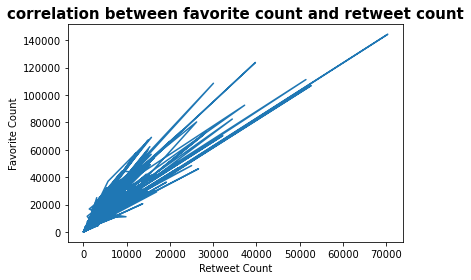

In [3]:
#seeing the correlation between favorite count and retweet count
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('correlation between favorite count and retweet count',fontsize=15,weight='bold')
plt.plot(df['retweet_count'],df['favorite_count']);

>This shows a positive corelation between favorite count and retweet count

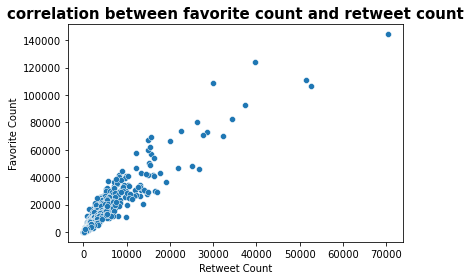

In [4]:
#seeing the correlation between favorite count and retweet count using scatterplot
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('correlation between favorite count and retweet count',weight='bold',fontsize=15)
sns.scatterplot(data=df,x='retweet_count',y='favorite_count');

>This just confirms they share a positive correlation

In [95]:
#checking which dog stage gets the most average retweets and likes
df.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False)

dog_stage
doggopuppo      16078.000000
doggo            5946.032258
puppo            5303.409091
floofer          3961.428571
doggopupper      3709.000000
doggofloofer     2785.000000
pupper           1915.696517
Name: retweet_count, dtype: float64

In [96]:
df.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False)

dog_stage
doggopuppo      41814.000000
puppo           19506.772727
doggo           17536.274194
doggofloofer    14803.000000
doggopupper     12673.625000
floofer         11181.714286
pupper           6228.104478
Name: favorite_count, dtype: float64

### Insights:
1.cooper and oliver are the two most common dog names

2.the dog Classifiers with all getting it right more than 70% of the time,the classifiers p2 and p1 work slightly better than p3

3.the retweet count and favorite count have a strong positive correlation with both of them increasing steadily

### Visualization

In [90]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6973,33701
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5275,29229
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3464,21976
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7193,36795
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7719,35185


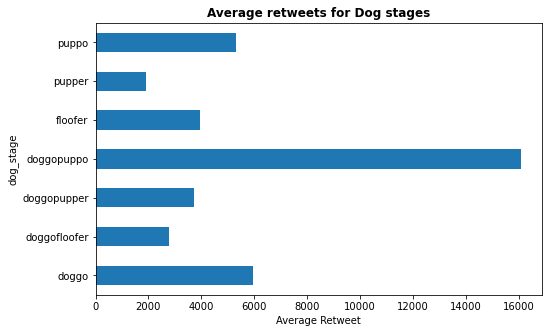

In [91]:
#Bar chart for Average retweets for each Dog stage
plt.figure(figsize=(8,5))
plt.title('Average retweets for Dog stages',weight='bold')
plt.xlabel('Average retweet'.title())
plt.ylabel('Dog Stage'.title())
df.groupby('dog_stage')['retweet_count'].mean().plot(kind='barh');

>From the above we can clearly say that the doggopupper dog stage has the highest average retweets by a mile 

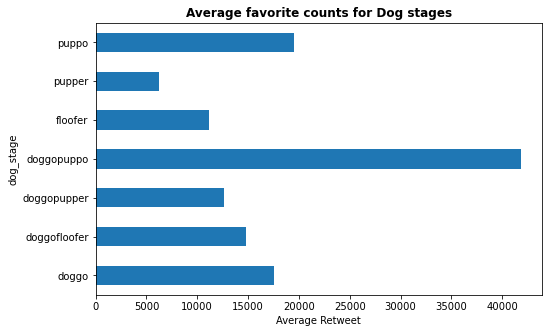

In [92]:
#Bar chart for Average likes for each Dog stage
plt.figure(figsize=(8,5))
plt.title('Average favorite counts for Dog stages',weight='bold')
plt.xlabel('Average retweet'.title())
plt.ylabel('Dog Stage'.title())
df.groupby('dog_stage')['favorite_count'].mean().plot(kind='barh');

> here too the doggopuppo stage has the highest number of likes on average and also confirms the positive correlation as both the highest and lowest dog stages in both graphs are the same 

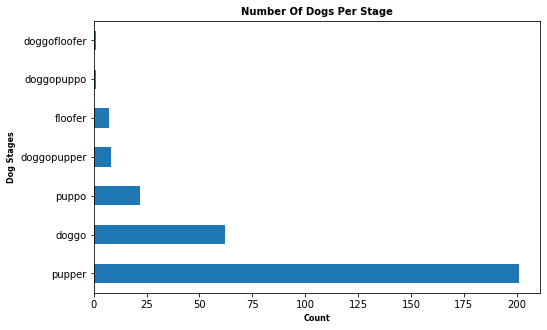

In [93]:
#Total number of each type of Dog stage
counts=df['dog_stage'].value_counts(ascending=False)
plt.figure(figsize=(8,5))
counts.plot( kind='barh');
plt.title(f'Number of dogs per stage'.title(), fontsize=10, weight ='bold' )
plt.xlabel('Count'.title(), fontsize=8,weight='bold')
plt.ylabel('Dog Stages'.title(), fontsize=8,weight='bold');

>from the graph we can see most of the dogs are at the pupper stage while very little are at the doggofloffer and doggopuppo stage